In [ ]:
import pandas as pd
import numpy as np
import string

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/train_data.txt", sep=':::', names=["title", "genre", "description"], engine='python')
test_data = pd.read_csv("/content/drive/MyDrive/test_data.txt", sep=':::', names=["title", "description"], engine='python')

In [ ]:
train_data.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_data.head()

,title,description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54200 non-null  object
 1   description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
train_data.describe()

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
test_data.describe()

,title,description
count,54200,54200
unique,54200,54072
top,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,1,10


In [ ]:
train_data.shape

(54214, 3)

In [ ]:
test_data.shape

(54200, 2)

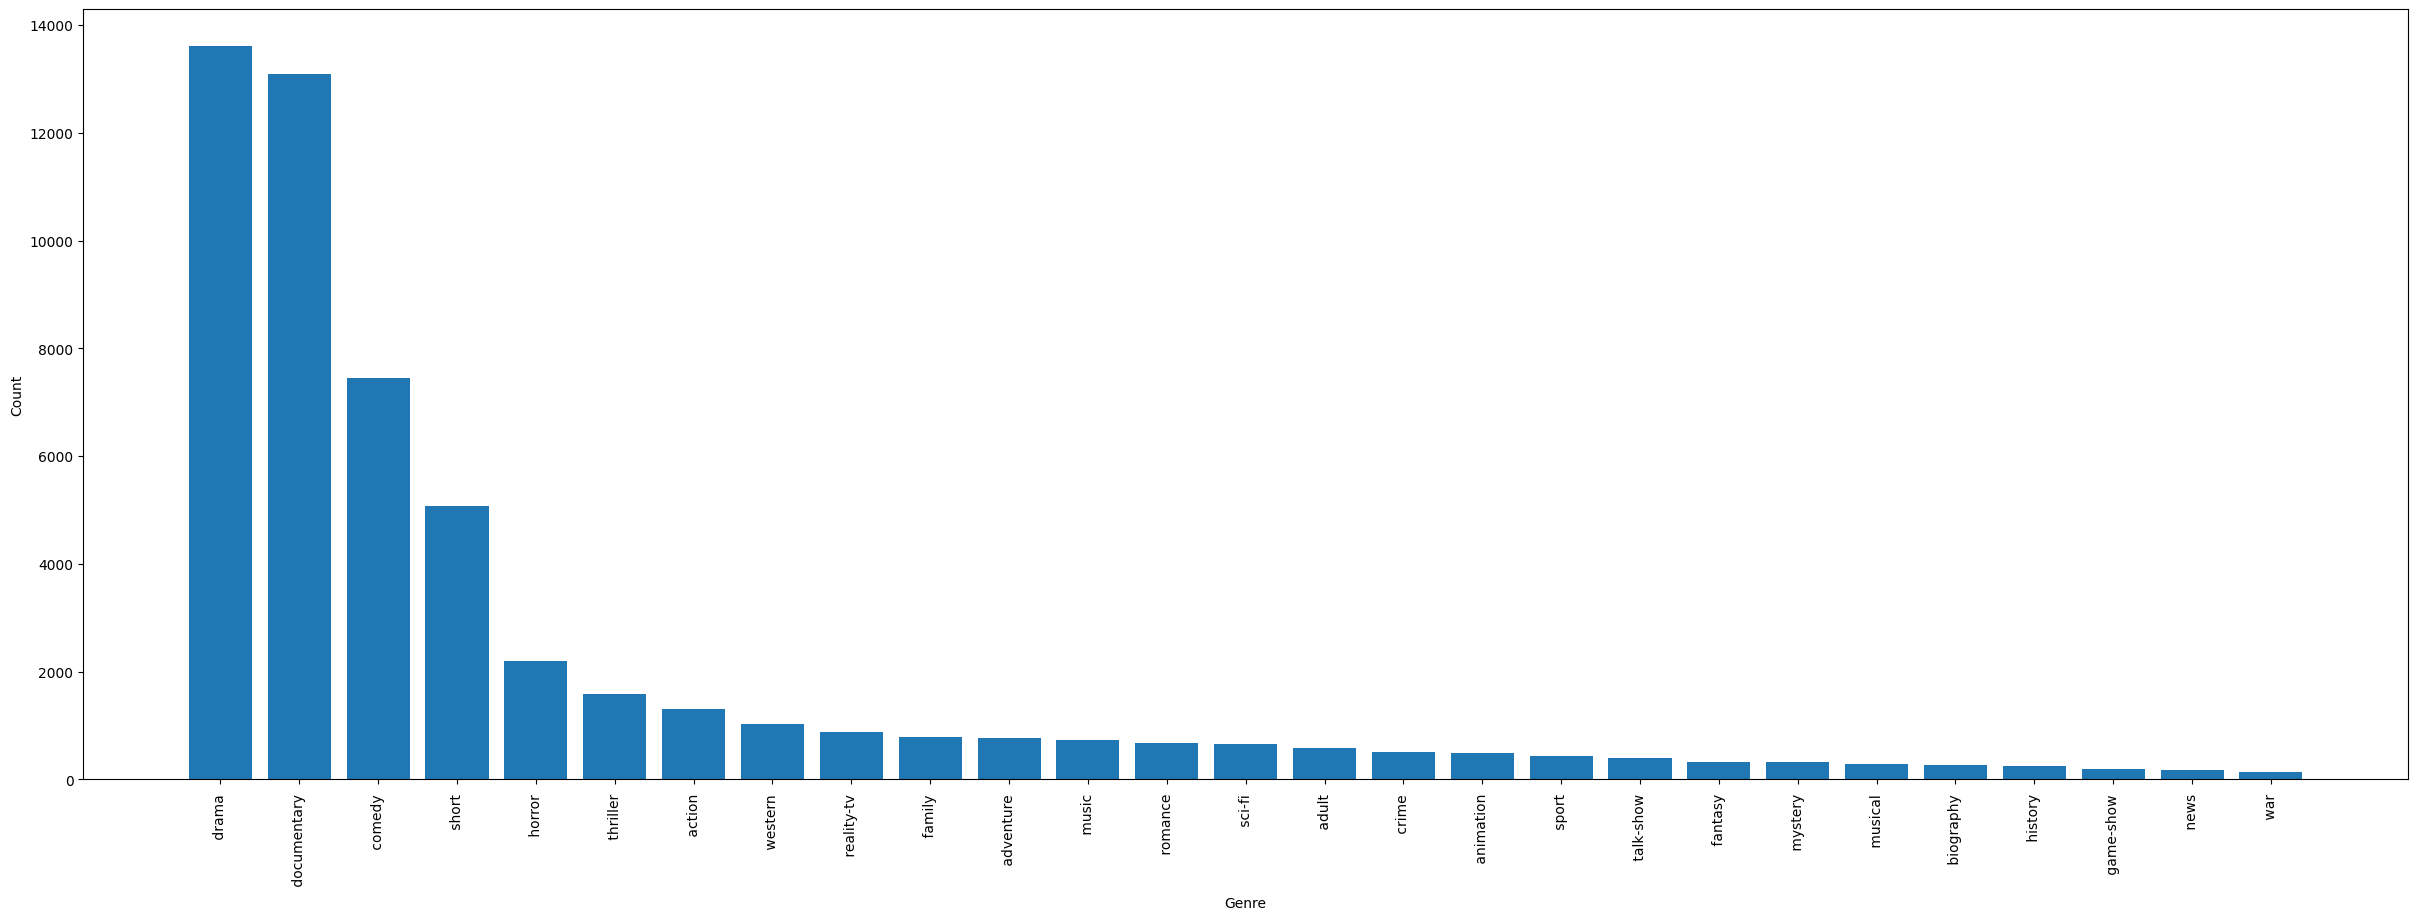

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,10))
counts = train_data.genre.value_counts()
plt.bar(counts.index, counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


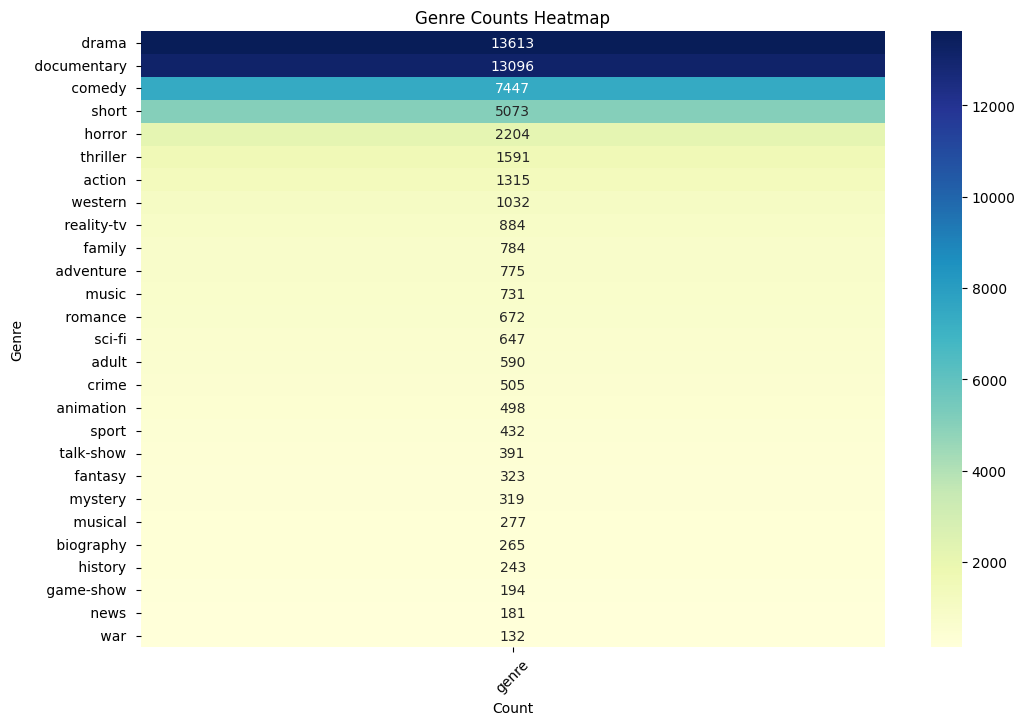

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(counts.to_frame(), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Genre Counts Heatmap')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.show()

In [ ]:
train_data.isnull().sum()

title          0
genre          0
description    0
dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def clean_data(text):
    text = text.lower()
    text = re.sub(r'@\S+','',text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[\w\.-]+@[\w\.-]+',"",text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')
    text = re.sub(r'pic.\S+', '',text)
    text = re.sub(r'#', "", text)
    text = re.sub(r"_", "  ", text)
    text = re.sub('\n'," . ",text)
    text = re.sub('\[[^]]*\]','',text)
    text = "".join([char for char in text if char not in string.punctuation])
    text= re.sub("\s[\s]+", " ",text).strip()
    tokens = word_tokenize(text)
    text = " ".join([word for word in tokens if word not in stop_words and len(word) > 2])

    return text

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train_data['description_cleaned'] = train_data['description'].apply(clean_data)
test_data['description_cleaned'] = test_data['description'].apply(clean_data)

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

st = PorterStemmer()
train_data['description_cleaned'] = train_data['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

test_data['description_cleaned'] = test_data['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [ ]:
train_data['length']=train_data['description'].apply(len)
train_data['length_cleaned']=train_data['description_cleaned'].apply(len)
train_data.head()

,title,genre,description,description_cleaned,length,length_cleaned
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...,546,339
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...,184,111
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...,650,344
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...,1082,678
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer recov bodi ground zero also st...,625,347


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['genre'] = le.fit_transform(train_data['genre'].values)

train_dt = train_data.loc[:,['description_cleaned', 'genre']]
test_dt = test_data.loc[:,['description_cleaned', 'title']]


In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(train_dt['description_cleaned'] , train_dt['genre'] , test_size=0.2 , shuffle=True , random_state = 42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(X_train)
val_set_tfidf = vectorize.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:

svm_model = LinearSVC()
svm_model.fit(train_set_tfidf, y_train)
prediction = svm_model.predict(val_set_tfidf)


In [ ]:
print(classification_report(y_test, prediction))
accuracy = accuracy_score(predict,y_test)

              precision    recall  f1-score   support

           0       0.46      0.33      0.39       263
           1       0.68      0.44      0.53       112
           2       0.39      0.21      0.27       139
           3       0.38      0.13      0.20       104
           4       0.00      0.00      0.00        61
           5       0.53      0.58      0.55      1443
           6       0.22      0.06      0.09       107
           7       0.68      0.80      0.73      2659
           8       0.55      0.71      0.62      2697
           9       0.37      0.15      0.22       150
          10       0.40      0.05      0.10        74
          11       0.83      0.62      0.71        40
          12       0.25      0.02      0.04        45
          13       0.60      0.63      0.61       431
          14       0.55      0.53      0.54       144
          15       0.27      0.06      0.10        50
          16       0.00      0.00      0.00        56
          17       0.29    

In [ ]:
print('SVC model accuracy is: {:.2f}%'.format(accuracy*100))

SVC model accuracy is: 57.13%


In [ ]:
movie_features = "A romantic comedy about a young man who falls in love with a cupid"
movie_tfidf = vectorize.transform([movie_features])
predicted_genre = svm_model.predict(movie_tfidf)
print("Predicted Genre:", predicted_genre)



Predicted Genre: [5]
